In [7]:
import pandas as pd

# Load the dataset
file_path = 'C:/VSCODE/ML/exemple/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. 결측값 처리
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)  # Cabin 열 삭제

# 2. 범주형 데이터 처리
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # male → 0, female → 1
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot 인코딩

# 3. 특성 선택 및 생성 - 중요하지 않은 열 제거 및 의미있는 특성 추가
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)  # 불필요 열 삭제

# 4. 스케일링
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# 5. 데이터 분리
X = data.drop('Survived', axis=1)  # 특성
y = data['Survived']  # 타겟 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



C:\Users\kweon\AppData\Local\Temp\ipykernel_46044\3097889819.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\kweon\AppData\Local\Temp\ipykernel_46044\3097889819.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

C:\Users\kweon\AppData\Local\Temp\ipykernel_46044\2505375038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', palette='viridis')


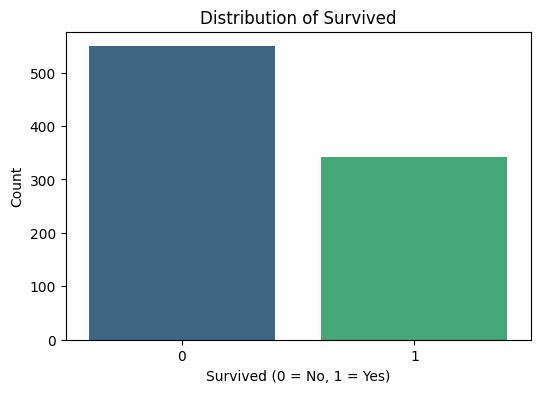

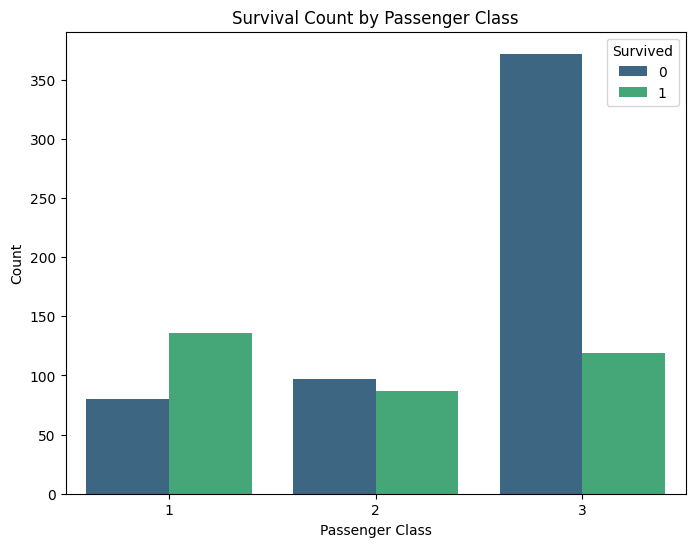

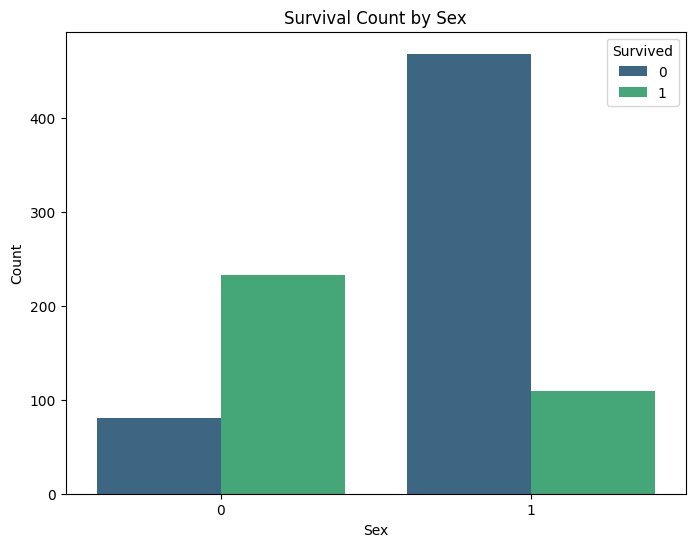

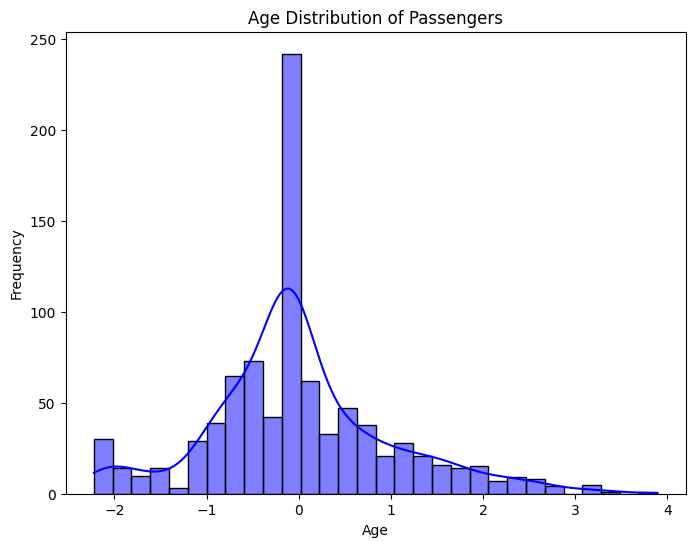

C:\Users\kweon\AppData\Local\Temp\ipykernel_46044\2505375038.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Survived', y='Age', palette='viridis')


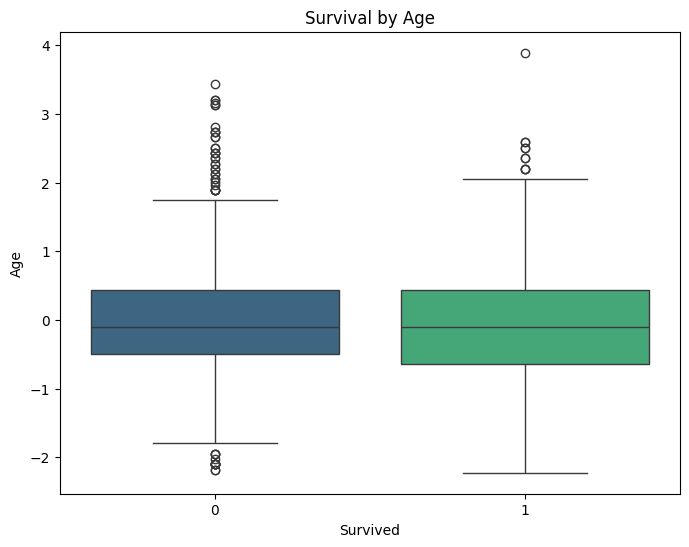

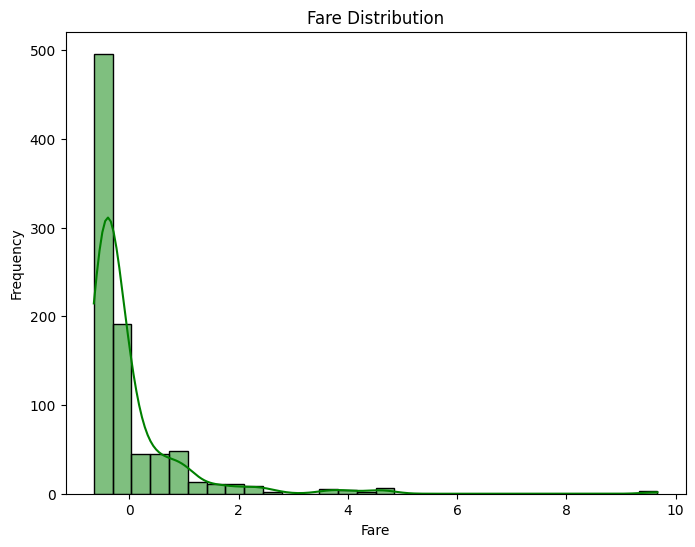

C:\Users\kweon\AppData\Local\Temp\ipykernel_46044\2505375038.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Survived', y='Fare', palette='viridis')


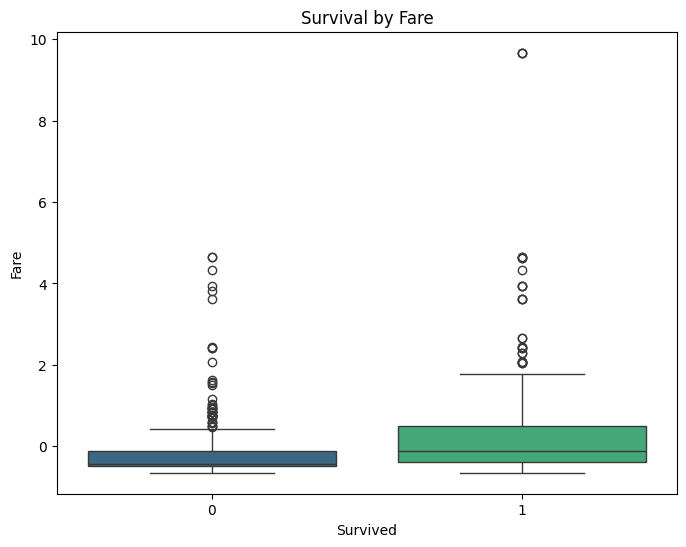

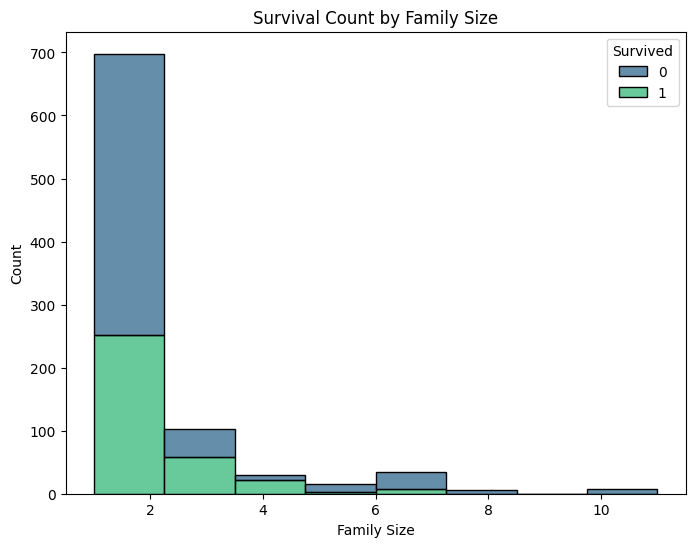

<Figure size 1000x600 with 0 Axes>

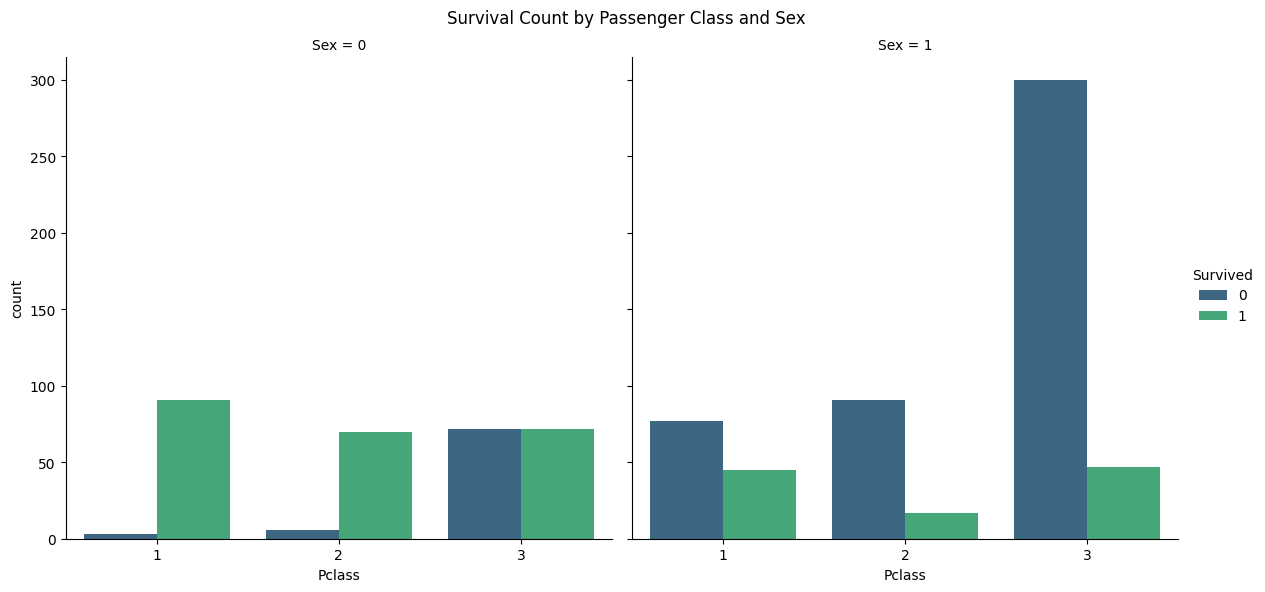

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수 분포
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Survived', palette='viridis')
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Pclass와 Survived 관계
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Sex와 Survived 관계
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# 나이 분포
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



# Age와 Survived 관계
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Survived', y='Age', palette='viridis')
plt.title('Survival by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# 요금 분포
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Fare', bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Fare와 Survived 관계
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Survived', y='Fare', palette='viridis')
plt.title('Survival by Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# FamilySize와 Survived 관계
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='FamilySize', hue='Survived', multiple='stack', palette='viridis', bins=8)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Pclass와 Sex에 따른 Survived 분포
plt.figure(figsize=(10, 6))
sns.catplot(data=data, x='Pclass', hue='Survived', col='Sex', kind='count', palette='viridis', height=6, aspect=1)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival Count by Passenger Class and Sex')
plt.show()


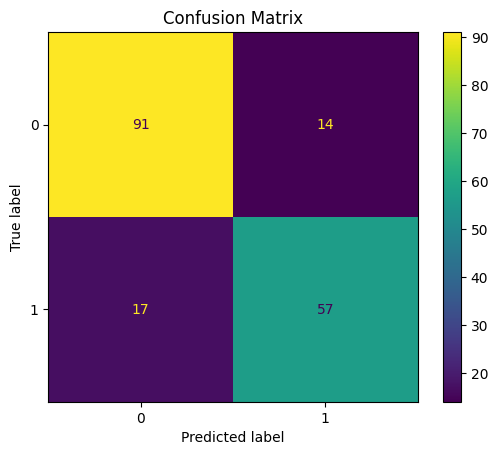

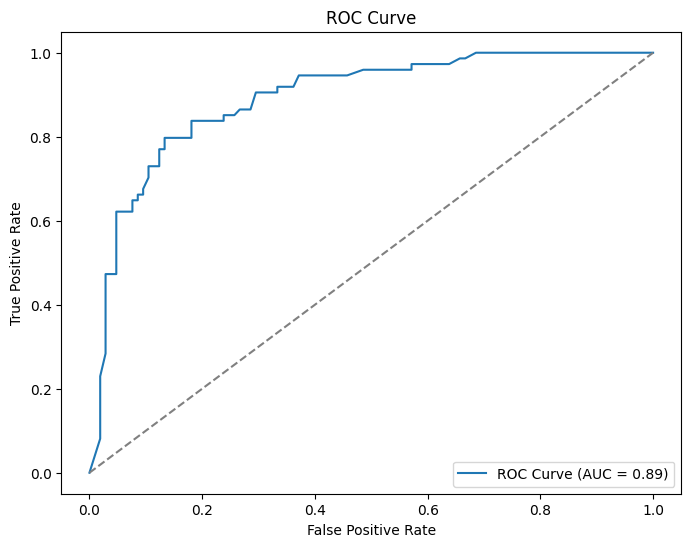

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()



y_prob = model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
